# MAST Rhytmic Visual Analysis

This notebook aims at the rhytmic visual analysis of percussion performances.

Along its content, the notebook extracts and plots onset information comprising student's and teacher's performances.

[NOTE] For the proper execution of this beta notebook, Please ensure that the MAST rhytmic dataset is located in the "data" folder according to the following hierachy:

_PROJECT ROOT_  
 &nbsp;&nbsp;&nbsp;&nbsp; data/  
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; MAST_rhythm_subset/  
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;_ALL DATA FILES_
    


We can now start our analysis by importing all MIR necessary libraries:

In [2]:
import os
from essentia.standard import *
from essentia import Pool, array
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd

For visualisation purposes, let's plot the onset representations for specific assignments. The following code will load the audio files as monophonic signal, extract their onset times and plot this information. Such process will be repeated for two pairs of songs: a pair (reference recording, student's performance) from a sucessful assignment and another pair from a failed assignment.

First of all, let's set the necessary parameters and load onset detection required functions:

In [3]:
dataset_dir = '../data/MAST_rhythm_subset'

approved_assignment = ['51_rhy1_ref154160.wav', '51_rhy1_per154160_pass.wav']
failed_assignment = ['51_rhy1_ref166260.wav', '51_rhy1_per166260_fail.wav']

# Setting audio processing parameters
fs = 44100
dur_in_secs=5
t = np.arange(dur_in_secs*fs)/float(fs)
zero_array = t*0 #used only for plotting purposes
window_size=1024
hop_size=512

# Loading Essentia's necessary tools
od_hfc = OnsetDetection(method='hfc')
od_complex = OnsetDetection(method='complex')
w = Windowing(type = 'hann')
fft = FFT() # this gives us a complex FFT
c2p = CartesianToPolar() # and this turns it into a pair (magnitude, phase)
onsets = Onsets()

Next, we extract the onset times for each pair (reference, performance) and plot them for visual purposes:

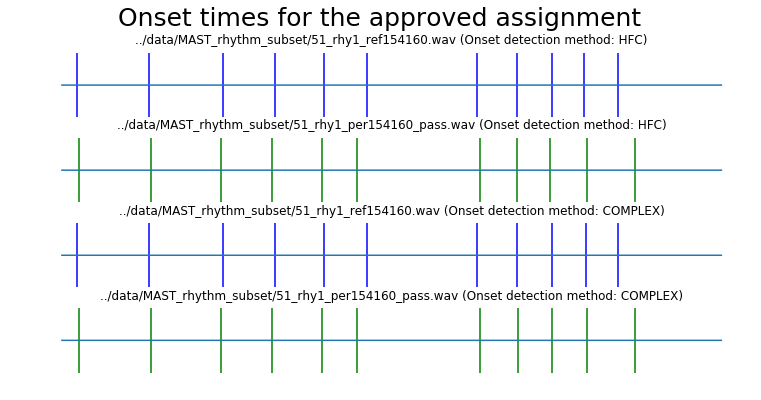

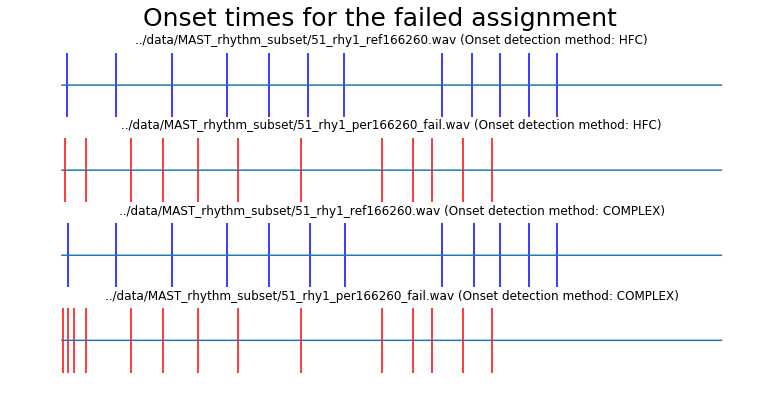

In [4]:

ind = 0
f, axarr = plt.subplots(4,1,figsize=(13, 6))
f.suptitle('Onset times for the approved assignment', fontsize=25)

for file in approved_assignment:
    file_name = os.path.join(dataset_dir, file)
    # Loading file as a monophonic audio
    x = MonoLoader(filename = file_name, sampleRate = fs)()
    # Let's use only the first five seconds of the signals
    x = x[:dur_in_secs*fs] 
    x = x/np.max(np.abs(x))
    
    pool = Pool()
    for frame in FrameGenerator(x, frameSize = window_size, hopSize = hop_size):
        mag, phase, = c2p(fft(w(frame)))
        pool.add('features.hfc', od_hfc(mag, phase))
        pool.add('features.complex', od_complex(mag, phase))
        
    onsets_hfc = onsets(array([pool['features.hfc']]),[1])
    onsets_complex = onsets(array([pool['features.complex']]),[1])  

    axarr[ind].plot(t,zero_array);axarr[ind].set_title("%s (Onset detection method: HFC)" % file_name);
    axarr[ind].axis('off')
    axarr[ind].vlines(onsets_hfc, -1, 1, 'b' if 'ref' in file_name else ('g' if 'pass' in file_name else 'r'))
    
    axarr[ind+2].plot(t,zero_array);axarr[ind+2].set_title("%s (Onset detection method: COMPLEX)" % file_name);
    axarr[ind+2].axis('off')
    axarr[ind+2].vlines(onsets_complex, -1, 1, 'b' if 'ref' in file_name else ('g' if 'pass' in file_name else 'r'))
    
    ind+=1

ind = 0
f, axarr = plt.subplots(4,1,figsize=(13, 6))

f.suptitle('Onset times for the failed assignment', fontsize=25)
for file in failed_assignment:
    file_name = os.path.join(dataset_dir, file)
    # Loading file as a monophonic audio
    x = MonoLoader(filename = file_name, sampleRate = fs)()
    # Let's use only the first five seconds of the signals
    x = x[:dur_in_secs*fs] 
    x = x/np.max(np.abs(x))
    
    pool = Pool()
    for frame in FrameGenerator(x, frameSize = window_size, hopSize = hop_size):
        mag, phase, = c2p(fft(w(frame)))
        pool.add('features.hfc', od_hfc(mag, phase))    
        pool.add('features.complex', od_complex(mag, phase))
        
    onsets_hfc = onsets(array([pool['features.hfc']]),[1])
    onsets_complex = onsets(array([pool['features.complex']]),[1])    
    
    axarr[ind].plot(t,zero_array);axarr[ind].set_title("%s (Onset detection method: HFC)" % file_name);
    axarr[ind].axis('off')
    axarr[ind].vlines(onsets_hfc, -1, 1, 'b' if 'ref' in file_name else ('g' if 'pass' in file_name else 'r'))
    
    axarr[ind+2].plot(t,zero_array);axarr[ind+2].set_title("%s (Onset detection method: COMPLEX)" % file_name);
    axarr[ind+2].axis('off')
    axarr[ind+2].vlines(onsets_complex, -1, 1, 'b' if 'ref' in file_name else ('g' if 'pass' in file_name else 'r'))
    
    ind+=1
    

With this initial approach we made use of Essentia's onset detection algorithms to plot onset times for approved and rejected performances. These plots already provides preliminary insights regarding notable diferences between vectors extracted from approved an rejected assignments